Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---


# Model Interpretation 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make a Shapley force plot to explain at least 1 individual prediction.
- [ ] Share at least 1 visualization (of any type) on Slack.

But, if you aren't ready to make a Shapley force plot with your own dataset today, that's okay. You can practice this objective with another dataset instead. You may choose any dataset you've worked with previously.

## Stretch Goals
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!


## Links
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

## Columns

**Country** Country

**Year** Year

**Status** Developed or Developing status

**Life expectancy** Life Expectancy in age

**Adult Mortality** Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

**infant** deaths Number of Infant Deaths per 1000 population

**Alcohol** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
percentage 

**expenditure** Expenditure on health as a percentage of Gross Domestic Product per capita(%)

**Hepatitis B** Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

**Measles** Measles - number of reported cases per 1000 population

**BMI** Average Body Mass Index of entire population

**under-five deaths** Number of under-five deaths per 1000 population

**Polio** Polio (Pol3) immunization coverage among 1-year-olds (%)

**Total expenditure** General government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

**HIV/AIDS** Deaths per 1 000 live births HIV/AIDS (0-4 years)

**GDP** Gross Domestic Product per capita (in USD)

**Population** Population of the country

**thinness 1-19 years** Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

**thinness 5-9 years** Prevalence of thinness among children for Age 5 to 9(%)

**Income composition of resources** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

**Schooling** Number of years of Schooling(years) 

# What factors contribute to lower quality of life?

What is the impact of Immunization related factors, Mortality factors, Economical factors and Social factors on life expectancy.

In [0]:
%%capture
!pip install eli5
!pip install pdpbox
!pip install shap

In [69]:
'''
After running a few models, i realized i have a leakage in my data.

- leakage data

Income composition of importances is leaking what the life expectancy 
should be. 

The Human Development Index (HDI) is a statistic composite index of 
life expectancy, education, and per capita income indicators, 
which are used to rank countries into four tiers of human development. 
... Examples include—Being: well fed, sheltered, healthy; Doings: 
work, education, voting, participating in community life.


more leakage data

expenditure is using GDP and total expenditure

infant mortality could also be representated by under_five_deaths
'''

'\nAfter running a few models, i realized i have a leakage in my data.\n\n- leakage data\n\nIncome composition of importances is leaking what the life expectancy \nshould be. \n\nThe Human Development Index (HDI) is a statistic composite index of \nlife expectancy, education, and per capita income indicators, \nwhich are used to rank countries into four tiers of human development. \n... Examples include—Being: well fed, sheltered, healthy; Doings: \nwork, education, voting, participating in community life.\n\n\nmore leakage data\n\nexpenditure is using GDP and total expenditure\n\ninfant mortality could also be representated by under_five_deaths\n'

In [0]:
# Choose your target. Which column in your tabular dataset will you predict?

# Life expectancy 

# Is your problem regression or classification?
# Regression

# Random Split

# How is your target distributed?
# target distribution is not a major factor. 

# Choose your evaluation metric(s).

#R2 to get a general idea of how well my model will fit to unseen data
#mean absolute error and root mean squared error to see the average error in 
#my prediction. 

 # How is your target distributed?
 # I am going to answer this using a pandas profile. 

data = 'https://raw.githubusercontent.com/EvidenceN/Life-Expectancy-Prediction/master/Life%20Expectancy/Data/Life%20Expectancy%20Data.csv'

 

In [71]:
import pandas as pd

life = pd.read_csv(data)

life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [72]:
life.shape

(2938, 22)

In [0]:
%%capture
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
import pandas_profiling

In [0]:
profile = pandas_profiling.ProfileReport(life)

In [75]:

profile

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Due to the nature of the dataset, i can not use imputation with a mean or median strategy. If i use imputation, 
# then i am taking information from other countries and putting it in for a different country. 
# for example, i will be taking population and GDP information from a different countries and imputing it as the
# population and GDP of a different countries. That information would be inaccurate. 

# I could meticoulously look up the information from the countries with missing data, but that would consume a lot of 
# time. 

In [0]:
# Drop rows with missing gdp and population information. That would leave me with 145 countries instead of 193 and 
# 75% of the total data. By doing this, i will loose 25% of the data. 

# for other features like Bmi, thinness, hepatitis B with missing values, i will input 0's for those missing values. 
# if values are missing for those features, 0 is a safe assumption and won't skew the data or disrupt the interpretation
# of the data

# XGboost can handle nan, but other models might struggle to handle nan, since imputation is not a viable option, then
# i will use 0 in place of nan's

# drop country and years because we are not comparing life expectancy from different countries or trying to see
# if the life exptancy of a country changes from year to year. The country and year the data originated from should 
# not be a predictor of life expectancy. 

# The objective is to use health factors to predict life expectancy. Having data from different countries over the
# years allows for diversity of information. 

# 

In [0]:
# drop gdp and population and life expectancy missing values
life = life.dropna(subset=['GDP', 'Population', 'Life_expectancy_'])

In [79]:
# get the mean baseline because this is a regression problem
# with regression, the baseline can be as simple as the mean.

mean_baseline = life['Life_expectancy_'].mean()
errors = mean_baseline - life['Life_expectancy_']
mean_absolute_error = errors.abs().mean()
print(f'Mean Baseline: {mean_baseline:.1f} years')
print('Without any other factors, this is what we will predict the life expectancy to be')
print(f'And {mean_baseline:.1f} will be off by {mean_absolute_error}')

Mean Baseline: 68.7 years
Without any other factors, this is what we will predict the life expectancy to be
And 68.7 will be off by 8.07205723126332


In [0]:
# split into train, test, validation 15% for testing, 15% for validation, 70% training. 
# No stratification in splitting because of ValueError: The least populated class in y has 
# only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

from sklearn.model_selection import train_test_split

train, test = train_test_split(life, test_size=0.15, random_state=42)

train, val = train_test_split(train, test_size=0.20, random_state=42)

In [0]:
# function to perform data cleaning on all datasets. 
def wrangle(x):
    x = x.copy()
    
    mapper = {'Country':'country', 'Year':'year', 'Status':'status', 'Life_expectancy_':'life expectancy', 
          'Adult_Mortality':'adult mortality', 'infant_deaths': 'infant deaths', 'Alcohol':'alcohol',
         'percentage_expenditure' :'percentage expenditure', 'Hepatitis_B': 'hepatitis B', 
          'Measles_': 'measles', '_BMI_': 'BMI', 'under-five_deaths_':'under five deaths', 'Polio':'polio',
         'Total_expenditure': 'total expenditure', 'Diphtheria_':'diphtheria', '_HIV/AIDS': 'HIV AIDS', 
          'Population':'population', '_thinness__1-19_years': 'thinness 10-19 years', 
          '_thinness_5-9_years': 'thinness 5-9 years', 
          'Income_composition_of_resources': 'income composition of resources', 'Schooling': 'schooling'}

    x = x.rename(columns=mapper)
    
    # dropping columns with leakage
    x = x.drop(columns = ['country', 'year', 'income composition of resources',
                         'percentage expenditure', 'infant deaths'])
    
    # filling nan values with 0 because I can't do imputation and the missing
    # values can be assumed to be 0.
    
    x = x.fillna(value=0)
    
    return x

In [0]:
# clean all data the same way
train = wrangle(train)
test = wrangle(test)
val = wrangle(val)

In [0]:
target = 'life expectancy'
features = train.columns.drop(target)

x_train = train[features]
y_train = train[target]
x_val = val[features]
y_val = val[target]
x_test = test[features]
y_test = test[target]

In [84]:
x_val.head()

,status,adult mortality,alcohol,hepatitis B,measles,BMI,under five deaths,polio,total expenditure,diphtheria,HIV AIDS,GDP,population,thinness 10-19 years,thinness 5-9 years,schooling
2210,Developing,16.0,3.63,41.0,0,69.7,0,55.0,4.47,49.0,0.1,2571.262348,179929.0,0.2,0.2,12.6
1173,Developed,5.0,7.81,0.0,0,59.7,0,89.0,8.68,89.0,0.1,44333.851800,32716.0,1.0,0.9,18.7
2472,Developing,284.0,1.76,0.0,2875,0.0,109,62.0,3.23,62.0,0.1,361.358430,2725535.0,0.0,0.0,5.5
2255,Developing,219.0,0.30,86.0,999,21.2,33,83.0,4.81,86.0,0.5,12.566464,1255917.0,1.6,1.5,7.5
770,Developing,152.0,0.00,81.0,0,58.9,7,87.0,0.00,85.0,0.3,6468.471648,1528394.0,3.3,3.2,13.2


In [0]:
# import libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import category_encoders as ce
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


LinearRegression R^2 Score 0.8172482930270827
LinearRegression mean_absolute_error 3.112260330142158
LinearRegression Coefficient [ 6.93940547e-01 -6.93940548e-01 -1.75814890e-02 -1.35135633e-01
  3.45077755e-03 -2.88876065e-05  4.72248204e-02  9.39312719e-05
  9.79658317e-03  4.24794463e-02  2.94977695e-02 -5.22955047e-01
  6.27252850e-05  1.96824153e-09 -1.38047103e-01  4.74373011e-02
  1.24357800e+00]
LinearRegression Intercept 53.59856624468452


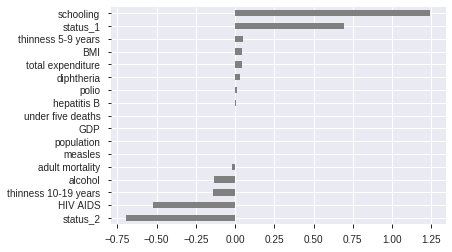

In [86]:
# beginning with linear regression model. 

# lr = linear regression model
lr = make_pipeline(
    ce.OneHotEncoder(),
    LinearRegression()
)

lr.fit(x_train, y_train)
lr_score = lr.score(x_val, y_val)

print(f'LinearRegression R^2 Score {lr_score}')

y_pred = lr.predict(x_val)

mae = mean_absolute_error(y_val, y_pred)

print(f'LinearRegression mean_absolute_error {mae}' )

coeff = lr.named_steps['linearregression'].coef_
print(f'LinearRegression Coefficient {coeff}')

intercept = lr.named_steps['linearregression'].intercept_
print(f'LinearRegression Intercept {intercept}')

# plotting the coefficients
encoder = lr.named_steps['onehotencoder']
columns = encoder.transform(x_val).columns
coefficients = pd.Series(coeff, columns)
coefficients.sort_values().plot.barh(color='grey');

In [87]:
# testing different alpha values with ridge regression model

for alpha in [10, 100, 10**3, 10**4, 10**5, 10**6]:
  print(f'for ridge regression with {alpha}')

  ridge = make_pipeline(
      ce.OneHotEncoder(),
      #StandardScaler(),
      Ridge(alpha=alpha))
  
  # fitting the model
  ridge.fit(x_train, y_train)

  # mean absolute error
  y_pred = ridge.predict(x_val)
  mae = mean_absolute_error(y_val, y_pred)
  print(f'Ridge regression mean_absolute_error {mae}' )

  # R2 score
  ridge_score = ridge.score(x_val, y_val,)
  print(f'Ridge Regression Score R^2 Score {ridge_score}\n')

# best ridge regression alpha is 10. 


for ridge regression with 10
Ridge regression mean_absolute_error 3.1120069951635285
Ridge Regression Score R^2 Score 0.817203602554093

for ridge regression with 100
Ridge regression mean_absolute_error 3.110418306048169
Ridge Regression Score R^2 Score 0.8168476616391003

for ridge regression with 1000
Ridge regression mean_absolute_error 3.1063451126789854
Ridge Regression Score R^2 Score 0.8153773959423228

for ridge regression with 10000
Ridge regression mean_absolute_error 3.3056112921076277
Ridge Regression Score R^2 Score 0.7928871894350141

for ridge regression with 100000
Ridge regression mean_absolute_error 3.6410495472661646
Ridge Regression Score R^2 Score 0.7248334790616584

for ridge regression with 1000000
Ridge regression mean_absolute_error 3.924321376871383
Ridge Regression Score R^2 Score 0.6702831672759353



Ridge regression mean_absolute_error 3.1109887188361496
Ridge Regression Score R^2 Score 0.8174939183703205

Ridge Regression Coefficient [ 0.27005563 -0.27005563 -2.2380393  -0.53087081  0.14245893 -0.35410141
  0.96135806  0.0163441   0.2518083   0.11022655  0.73543106 -2.63434636
  0.89196833  0.13339531 -0.62752859  0.19049694  4.19596599]
Ridge Regression Intercept 68.67859466493168


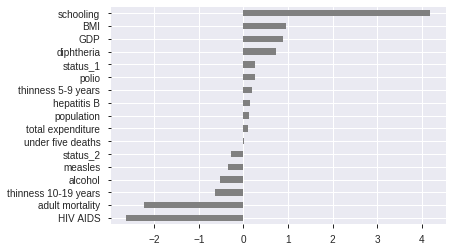

In [88]:
# ridge regression model

ridge = make_pipeline(
      ce.OneHotEncoder(),
      StandardScaler(),
      Ridge(alpha=10))
  
  # fitting the model
ridge.fit(x_train, y_train)

  # mean absolute error
y_pred = ridge.predict(x_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Ridge regression mean_absolute_error {mae}' )

  # R2 score
ridge_score = ridge.score(x_val, y_val,)
print(f'Ridge Regression Score R^2 Score {ridge_score}\n')

coeff = ridge.named_steps['ridge'].coef_
print(f'Ridge Regression Coefficient {coeff}')

intercept = ridge.named_steps['ridge'].intercept_
print(f'Ridge Regression Intercept {intercept}')

# plotting the coefficients
encoder = ridge.named_steps['onehotencoder']
columns = encoder.transform(x_val).columns
coefficients = pd.Series(coeff, columns)
coefficients.sort_values().plot.barh(color='grey');

In [89]:
# decision tree model

tree = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeRegressor(random_state=42)
)

tree.fit(x_train, y_train)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['status'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'status',
                                          'data_type': dtype('O'),
                                          'mapping': Developed     1
Developing    2
NaN          -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='mse', max_depth=None,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                

In [90]:
# mean absolute error
y_pred = tree.predict(x_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Decision tree mean_absolute_error {mae}' )

# R2 score
tree_score = tree.score(x_val, y_val,)
print(f'Decision tree Score R^2 Score {tree_score}')

Decision tree mean_absolute_error 1.571948051948052
Decision tree Score R^2 Score 0.9305497135770906


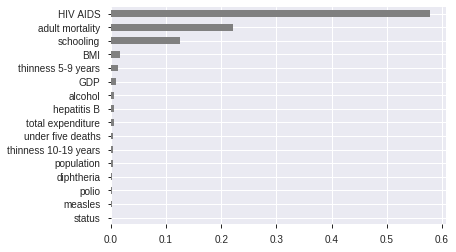

In [91]:
# plotting the feature importances
model = tree.named_steps['decisiontreeregressor']
encoder = tree.named_steps['ordinalencoder']
columns = encoder.transform(x_val).columns
importances = pd.Series(model.feature_importances_, columns)
importances.sort_values().plot.barh(color='grey');

random forest mean_absolute_error 1.1737714285714267
random forest Score R^2 Score 0.9627052433103265


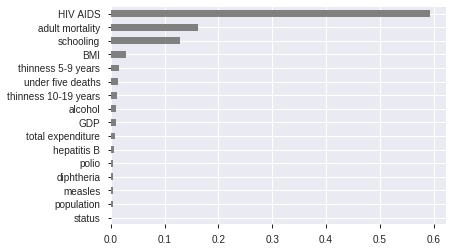

In [164]:
# random forest model

forest = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
)

forest.fit(x_train, y_train)

# mean absolute error
y_pred_val = forest.predict(x_val)
mae = mean_absolute_error(y_val, y_pred_val)
print(f'random forest mean_absolute_error {mae}' )

# R2 score
forest_score = forest.score(x_val, y_val,)

print(f'random forest Score R^2 Score {forest_score}')

# plotting the feature importances
model = forest.named_steps['randomforestregressor']
encoder = forest.named_steps['ordinalencoder']
columns = encoder.transform(x_val).columns
importances = pd.Series(model.feature_importances_, columns)
importances.sort_values().plot.barh(color='grey');

[05:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
gradient boosting mean_absolute_error 1.624503300654424
gradient boosting Score R^2 Score 0.9433935550192273


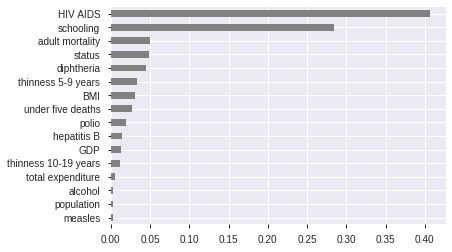

In [93]:
# gradient boosting model

boost = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(random_state=42, n_estimators=100, n_jobs=-1)
);

boost.fit(x_train, y_train);

# mean absolute error
y_pred = boost.predict(x_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'gradient boosting mean_absolute_error {mae}' );

# R2 score
boost_score = boost.score(x_val, y_val,)
print(f'gradient boosting Score R^2 Score {boost_score}');

# plotting the feature importances
model = boost.named_steps['xgbregressor']
encoder = boost.named_steps['ordinalencoder']
columns = encoder.transform(x_val).columns
importances = pd.Series(model.feature_importances_, columns)
importances.sort_values().plot.barh(color='grey');

[05:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:34.2154	validation_1-mae:34.0396
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 50 rounds.
[1]	validation_0-mae:17.1818	validation_1-mae:16.9988
[2]	validation_0-mae:8.67337	validation_1-mae:8.58604
[3]	validation_0-mae:4.43663	validation_1-mae:4.45652
[4]	validation_0-mae:2.39649	validation_1-mae:2.61883
[5]	validation_0-mae:1.53803	validation_1-mae:2.02653
[6]	validation_0-mae:1.2282	validation_1-mae:1.84554
[7]	validation_0-mae:1.0267	validation_1-mae:1.756
[8]	validation_0-mae:0.904274	validation_1-mae:1.67313
[9]	validation_0-mae:0.858503	validation_1-mae:1.68514
[10]	validation_0-mae:0.747679	validation_1-mae:1.65172
[11]	validation_0-mae:0.730235	validation_1-mae:1.64785
[12]	validation_0-mae:0.67974	validation_1-mae:1.65451
[13]	valida

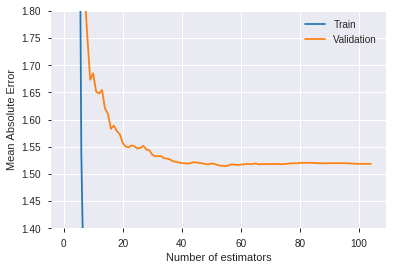

In [94]:
#documentation: https://xgboost.readthedocs.io/en/latest/parameter.html
#https://xgboost.readthedocs.io/en/latest/

# early stopping  with gradient boosting

encoder = ce.OrdinalEncoder()
x_train_encoded = encoder.fit_transform(x_train)
x_val_encoded = encoder.transform(x_val)

model = XGBRegressor(random_state=42, 
                     n_estimators=1000, 
                     n_jobs=-1,
                     max_depth = 7,
                     learning_rate = 0.5)

# a list of x,y tuple pairs to use for evaluation set 
eval_set = [(x_train_encoded, y_train), (x_val_encoded, y_val)]

model.fit(x_train_encoded, y_train,
          eval_set = eval_set,
          eval_metric = 'mae',
          early_stopping_rounds=50) # number of times you will have consistent results before it stops training. 

results=model.evals_result()
train_error = results['validation_0']['mae']
val_error = results['validation_1']['mae']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of estimators')
plt.ylim(1.4,1.8)
plt.legend();


In [0]:
# Tomorrow, 

# Permutation importances, PDP, and shapley values

In [96]:
# using my best model which is the random forest model for prediction
# with my test data set. 
y_pred_test = forest.predict(x_test)
mae = mean_absolute_error(y_test, y_pred_test)
print(f'random forest test mean_absolute_error {mae}' )

# R2 score
forest_score = forest.score(x_test, y_test,)
print(f'random forest test Score R^2 Score {forest_score}')

random forest test mean_absolute_error 1.326220588235294
random forest test Score R^2 Score 0.9578973850397267


In [97]:
row = x_val.iloc[[20]]
row

,status,adult mortality,alcohol,hepatitis B,measles,BMI,under five deaths,polio,total expenditure,diphtheria,HIV AIDS,GDP,population,thinness 10-19 years,thinness 5-9 years,schooling
2274,Developing,133.0,8.58,93.0,2,54.5,1,97.0,8.99,92.0,0.1,4129.758741,7411569.0,2.5,2.5,13.4


In [98]:
# testing the accuracy of my prediction

row = x_val.iloc[[20]]

# true y value
col = y_val.iloc[20]
print(col)

# predicted y value
forest.predict(row)[0]

73.6


73.59000000000002

In [163]:
# permutation importance. Looking at how the R2 score decreases when a feature 
# is rendered useless. This will give us an idea of how important each feature is

# since eli5 doesn't work with pipelines. i have to re-do random forest. 

encoding = make_pipeline(
    ce.OrdinalEncoder()
)

x_train_encoded = encoding.fit_transform(x_train)
x_val_encoded = encoding.transform(x_val)

model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(x_train_encoded, y_train)

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    #scoring = 'r2', 
    n_iter = 5,
    random_state = 42
)

permuter.fit(x_val_encoded, y_val)

feature_names = x_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names,
)

Weight,Feature
0.2919 ± 0.0189,HIV AIDS
0.2463 ± 0.0273,adult mortality
0.1234 ± 0.0151,schooling
0.0350 ± 0.0086,BMI
0.0148 ± 0.0038,thinness 5-9 years
0.0136 ± 0.0032,under five deaths
0.0091 ± 0.0037,GDP
0.0072 ± 0.0017,thinness 10-19 years
0.0064 ± 0.0023,alcohol
0.0038 ± 0.0005,polio


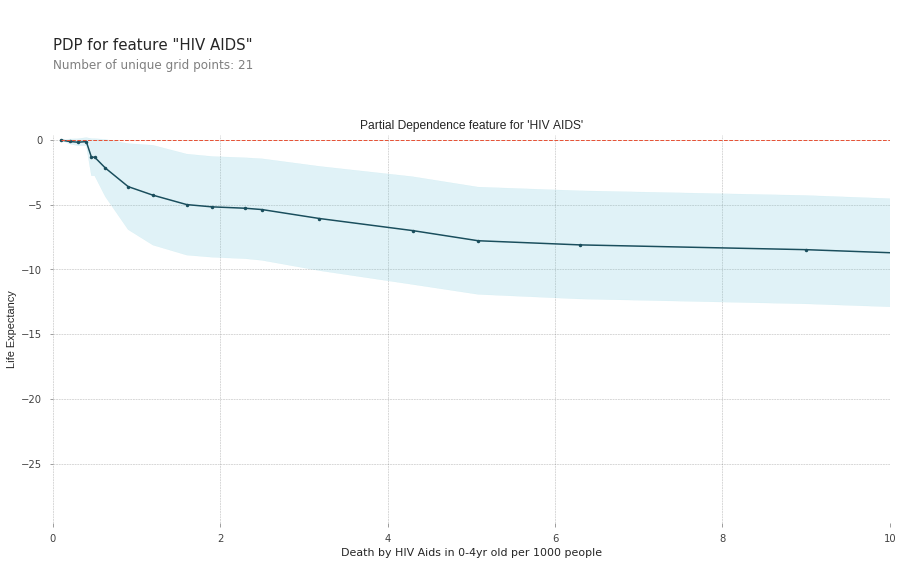

In [105]:
# Partial Dependence Plot (PDP)
# pdp plots work with pipelines. 

%matplotlib inline
plt.rcParams['figure.dpi'] = 72
from pdpbox.pdp import pdp_isolate, pdp_plot

# using random forest model from the earlier pipeline. 

# single feature isolation. 

feature = 'HIV AIDS'

isolated = pdp_isolate(
    model=forest,
    dataset=x_val,
    model_features = x_val.columns,
    feature = feature,
    num_grid_points=50,
)

# plotting the isolated features
pdp_plot(isolated, feature_name=feature)
plt.xlim(0,10)
plt.title("Partial Dependence feature for 'HIV AIDS'")
plt.ylabel('Life Expectancy')
plt.xlabel('Death by HIV Aids in 0-4yr old per 1000 people');

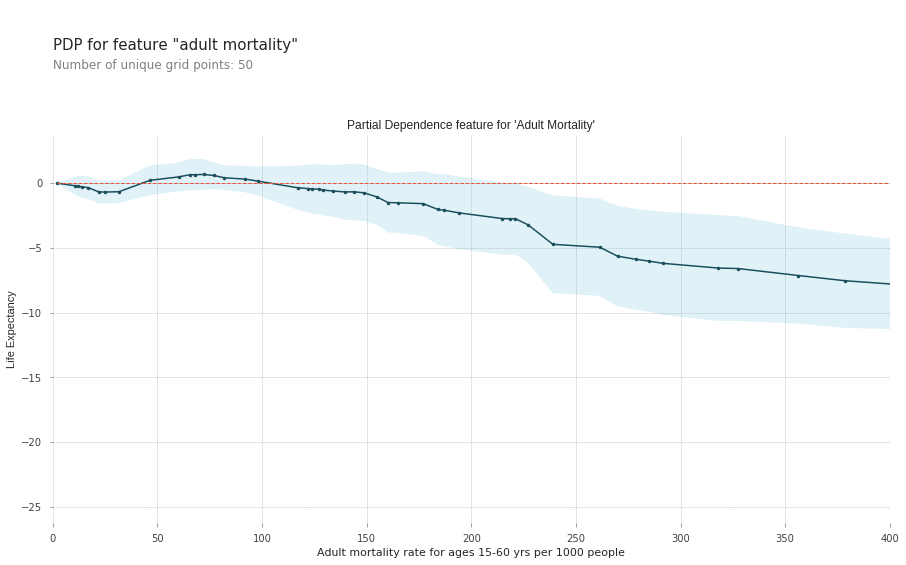

In [101]:
# Partial Dependence Plot (PDP)
# pdp plots work with pipelines. 

%matplotlib inline
plt.rcParams['figure.dpi'] = 72
from pdpbox.pdp import pdp_isolate, pdp_plot

# using random forest model from the earlier pipeline. 

# single feature isolation. 

feature = 'adult mortality'

isolated = pdp_isolate(
    model=forest,
    dataset=x_val,
    model_features = x_val.columns,
    feature = feature,
    num_grid_points=50
)

# plotting the isolated features
pdp_plot(isolated, feature_name=feature, frac_to_plot=10)
plt.xlim(0,400)
plt.title("Partial Dependence feature for 'Adult Mortality'")
plt.ylabel('Life Expectancy')
plt.xlabel('Adult mortality rate for ages 15-60 yrs per 1000 people');

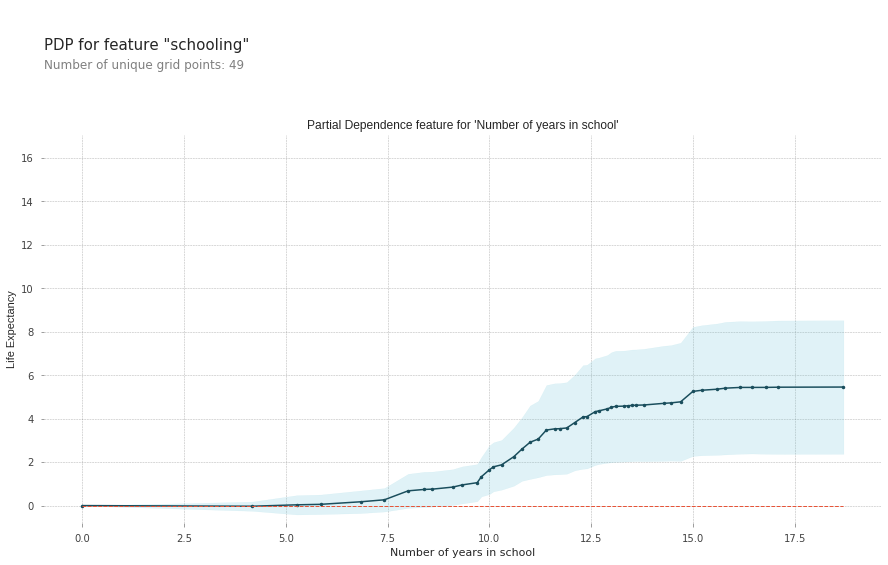

In [103]:
# Partial Dependence Plot (PDP)
# pdp plots work with pipelines. 

%matplotlib inline
plt.rcParams['figure.dpi'] = 72
from pdpbox.pdp import pdp_isolate, pdp_plot

# using random forest model from the earlier pipeline. 

# single feature isolation. 

feature = 'schooling'

isolated = pdp_isolate(
    model=forest,
    dataset=x_val,
    model_features = x_val.columns,
    feature = feature,
    num_grid_points=50
)

# plotting the isolated features
pdp_plot(isolated, feature_name=feature)
plt.title("Partial Dependence feature for 'Number of years in school'")
plt.ylabel('Life Expectancy')
plt.xlabel('Number of years in school');

In [0]:
# Partial Dependence Plot (PDP)
# pdp plots work with pipelines. 

%matplotlib inline
plt.rcParams['figure.dpi'] = 72
from pdpbox.pdp import pdp_isolate, pdp_plot

# using random forest model from the earlier pipeline. 

# single feature isolation. 

feature = 'BMI'

isolated = pdp_isolate(
    model=forest,
    dataset=x_val,
    model_features = x_val.columns,
    feature = feature,
    num_grid_points=50
)

# plotting the isolated features
pdp_plot(isolated, feature_name=feature)
plt.title("Partial Dependence feature for 'Body Mass Index'")
plt.ylabel('Life Expectancy')
plt.xlabel('Average Body Mass Index of entire population');

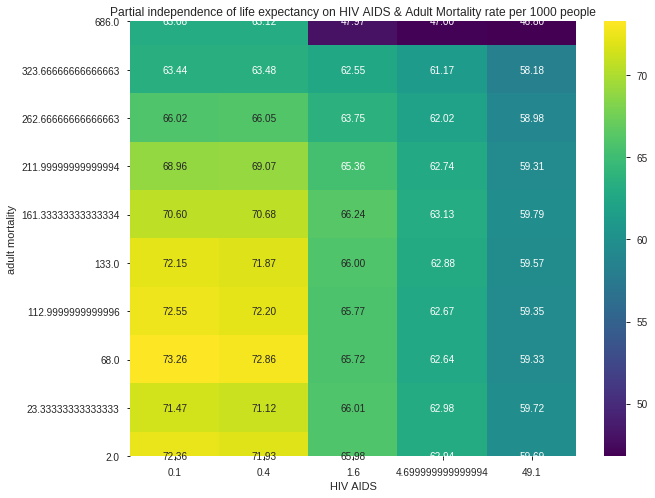

In [121]:
%matplotlib inline
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import seaborn as sns

features = ['HIV AIDS', 'adult mortality']

interaction = pdp_interact(
    model=forest,
    dataset=x_val,
    model_features = x_val.columns,
    features=features
)

# pdp_interact_plot(interaction, plot_type='grid', feature_names=features)
pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0],
    index=features[1])[::-1]

plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial independence of life expectancy on HIV AIDS & Adult Mortality rate per 1000 people');

In [0]:
# create more 2d and 3d partial independence plots for different features. 



In [158]:
# 3d partial independence box
import plotly.graph_objects as go

surface = go.Surface(
    x=pdp.columns,
    y=pdp.index,
    z=pdp.values
)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target),),
        title='Partial independence of life expectancy on HIV AIDS & Adult Mortality rate per 1000 people',
)

fig = go.Figure(surface, layout)
fig.show()

In [165]:
row = x_val.iloc[[20]]
forest.predict(row)

array([73.59])

In [0]:
# shapley plot # doesn't support pipelines

encoding = ce.OrdinalEncoder()

x_train_encoded = encoding.fit_transform(x_train)
x_val_encoded = encoding.transform(x_val)

model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(x_train_encoded, y_train)


In [193]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values = shap_values,
    features=row)

In [211]:
x_val_encoded.head()

,status,adult mortality,alcohol,hepatitis B,measles,BMI,under five deaths,polio,total expenditure,diphtheria,HIV AIDS,GDP,population,thinness 10-19 years,thinness 5-9 years,schooling
2210,2,16.0,3.63,41.0,0,69.7,0,55.0,4.47,49.0,0.1,2571.262348,179929.0,0.2,0.2,12.6
1173,1,5.0,7.81,0.0,0,59.7,0,89.0,8.68,89.0,0.1,44333.851800,32716.0,1.0,0.9,18.7
2472,2,284.0,1.76,0.0,2875,0.0,109,62.0,3.23,62.0,0.1,361.358430,2725535.0,0.0,0.0,5.5
2255,2,219.0,0.30,86.0,999,21.2,33,83.0,4.81,86.0,0.5,12.566464,1255917.0,1.6,1.5,7.5
770,2,152.0,0.00,81.0,0,58.9,7,87.0,0.00,85.0,0.3,6468.471648,1528394.0,3.3,3.2,13.2
686,1,68.0,11.68,88.0,0,53.8,0,98.0,6.12,98.0,0.1,16372.291520,976966.0,0.9,1.0,12.5
2001,2,163.0,6.38,92.0,0,42.8,4,96.0,6.70,96.0,0.2,157.145691,5795494.0,2.3,2.2,12.3
1523,1,169.0,15.19,94.0,11,61.9,0,93.0,6.55,93.0,0.1,16554.971390,2932367.0,2.6,2.7,16.5
455,2,124.0,4.16,98.0,0,26.2,0,99.0,3.96,99.0,0.4,3638.959460,491723.0,7.8,7.8,12.2
2688,2,121.0,1.39,92.0,0,6.2,29,96.0,6.70,96.0,0.1,185.689750,74432.0,5.0,4.8,12.5


In [210]:
# shapley plot # doesn't support pipelines

row = x_val_encoded.iloc[[13]]
model.predict(row)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values = shap_values,
    features=row)

In [218]:
# shapley plot # doesn't support pipelines

row = x_val_encoded.iloc[[37]]
model.predict(row)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values = shap_values,
    features=row)

In [219]:
# shapley plot # doesn't support pipelines

row = x_val_encoded.iloc[[1]]
model.predict(row)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values = shap_values,
    features=row)

In [0]:
# maybe create 2d and 3d graphs showing relationships. 
# create more 2d and 3d partial independence plots for different features. 
